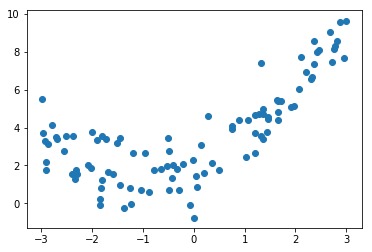

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
x = np.random.uniform(-3.,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 +x +2 +np.random.normal(0,1,100)
plt.scatter(x,y)
plt.show()

### 学习曲线
每次给训练的数据集不同，来观察模型的表现

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train,X_test,y_train,y_test = train_test_split(X,y)

def plot_learn_cueve(method,X_train,X_test,y_train,y_test):
    # 记录数据 使用均方误差衡量
    train_score = []
    test_score = []
    for i in range(1,len(X_train)+1):
       
        method.fit(X_train[:i],y_train[:i])
        y_train_predict =method.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i],y_train_predict))
        y_test_predict = method.predict(X_test)
        test_score.append(mean_squared_error(y_test,y_test_predict))
    plt.plot([i for i in range(1,len(X_train)+1)],np.sqrt(train_score),label="train")
    plt.plot([i for i in range(1,len(X_train)+1)],np.sqrt(test_score),label="test")
    plt.axis([0,len(X_train+1),0,4])
    plt.legend()
    plt.show()
    

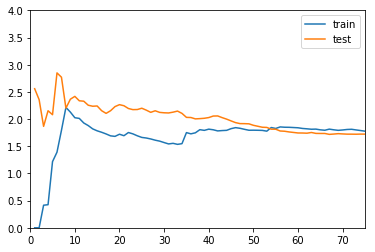

In [39]:
plot_learn_cueve(LinearRegression(),X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [40]:
# 使用多项式回归查看学习quxian
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
def PolynomialRegression(degree):
    return Pipeline([
        ("ploy",PolynomialFeatures(degree=degree)),
        ("stand",StandardScaler()),
        ("method",LinearRegression()),
    ])
poly_reg2 = PolynomialRegression(degree=2)

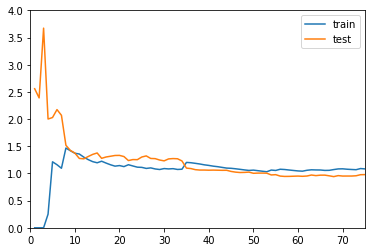

In [41]:
plot_learn_cueve(poly_reg2,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

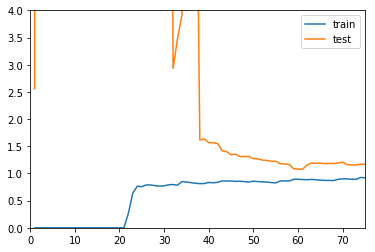

In [42]:
poly_reg2 = PolynomialRegression(degree=20)
plot_learn_cueve(poly_reg2,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)